In [1]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for viscosity of water is collected.

In [2]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/physicalproperties/viscosity/water.csv')
expdata_df

,ID,ComponentName,Viscosity,StdDev,Temperature,Pressure,PhaseType,Comment,Reference
0,11,water,1.7500,0.1,273.15,1.01325,2,NaN,Perry1998
1,12,water,1.6520,0.1,275.00,1.01325,2,NaN,Perry1998
2,13,water,0.6310,0.1,315.00,1.01325,2,NaN,Perry1998
3,14,water,0.5770,0.1,320.00,1.01325,2,NaN,Perry1998
4,15,water,0.4890,0.1,330.00,1.01325,2,NaN,Perry1998
5,16,water,0.4200,0.1,340.00,1.01325,2,NaN,Perry1998
6,17,water,0.3650,0.1,350.00,1.01325,2,NaN,Perry1998
7,18,water,0.3240,0.1,360.00,1.01325,2,NaN,Perry1998
8,19,water,0.2890,0.1,370.00,1.01325,2,NaN,Perry1998
9,22,water,1.0800,0.1,290.00,1.01325,2,NaN,Perry1998


<Figure size 640x480 with 0 Axes>

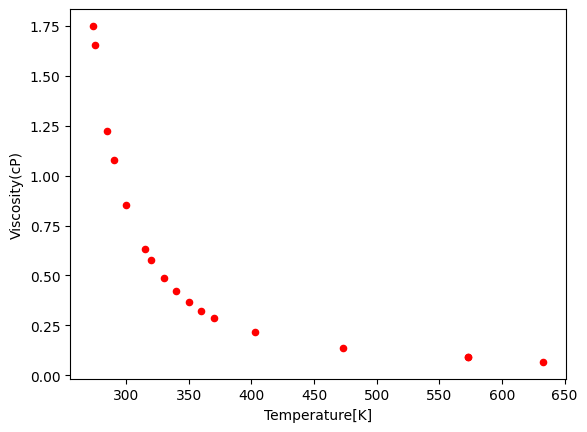

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Temperature', y='Viscosity', kind='scatter',ylabel='Viscosity(cP)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations

<Figure size 640x480 with 0 Axes>

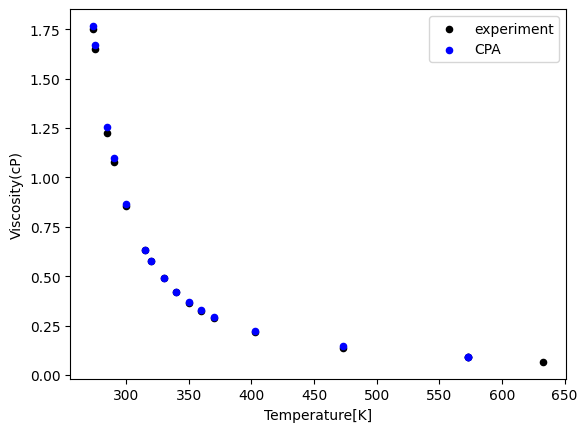

In [6]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('water', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(100.0, 'bara')

def viscosity(temp):
    fluid1.setTemperature(temp, 'K')
    try:
        TPflash(fluid1)
        fluid1.initProperties()
        return fluid1.getPhase('aqueous').getViscosity('cP')
    except:
        return float("nan")
temperatures = expdata_df['Temperature'].values.tolist()
visc_res = [viscosity(T) for T in temperatures]

dataWithExperiment = expdata_df.assign(calc_viscosity = visc_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature', y='Viscosity', kind='scatter',ylabel='Viscosity(cP)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature', y='calc_viscosity', kind='scatter',ylabel='Viscosity(cP)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting